In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.7.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
pd.read_csv('/WISDM_ar_v1.1_raw.txt')

,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286;
0,33,Jogging,4.910606e+13,5.012288,11.264028,0.95342433;
1,33,Jogging,4.910611e+13,4.903325,10.882658,-0.08172209;
2,33,Jogging,4.910622e+13,-0.612916,18.496431,3.0237172;
3,33,Jogging,4.910633e+13,-1.184970,12.108489,7.205164;
4,33,Jogging,4.910644e+13,1.375655,-2.492524,-6.510526;
...,...,...,...,...,...,...
41681,20,Downstairs,2.253812e+12,3.910000,6.590000,0.61291564;
41682,20,Downstairs,2.253862e+12,1.990000,2.960000,-1.7297841;
41683,20,Downstairs,2.253912e+12,6.780000,7.970000,-0.08172209;
41684,20,Downstairs,2.253962e+12,6.700000,6.130000,3.0237172;


In [ ]:
file = open('/WISDM_ar_v1.1_raw.txt')
lines = file.readlines()

processedList = []

for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)

In [ ]:
processedList

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621'],
 ['33', 'Jogging', '49106982315000', '-8.19945', '19.57244', '2.7240696'],
 ['33', 'Jogging', '49107092330000', '1.4165162', '5.7886477', '2.982856'],
 ['33', 'Jogging', '49107202316000', '-1.879608', '-2.982856', '-0.2996

In [ ]:
columns = ['user', 'activity', 'time', 'x', 'y', 'z']

In [ ]:
data = pd.DataFrame(data = processedList, columns = columns)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [ ]:
data.shape

(128904, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128904 entries, 0 to 128903
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      128904 non-null  object
 1   activity  128904 non-null  object
 2   time      128904 non-null  object
 3   x         128904 non-null  object
 4   y         128904 non-null  object
 5   z         128904 non-null  object
dtypes: object(6)
memory usage: 5.9+ MB


In [ ]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [ ]:
data['activity'].value_counts()

Walking       56476
Jogging       43898
Downstairs    14836
Upstairs      13694
Name: activity, dtype: int64

In [ ]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128904 entries, 0 to 128903
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      128904 non-null  object 
 1   activity  128904 non-null  object 
 2   time      128904 non-null  object 
 3   x         128904 non-null  float64
 4   y         128904 non-null  float64
 5   z         128904 non-null  float64
dtypes: float64(3), object(3)
memory usage: 5.9+ MB


In [ ]:
Fs = 20

In [ ]:
activities = data['activity'].value_counts().index

In [ ]:
Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

NameError: ignored

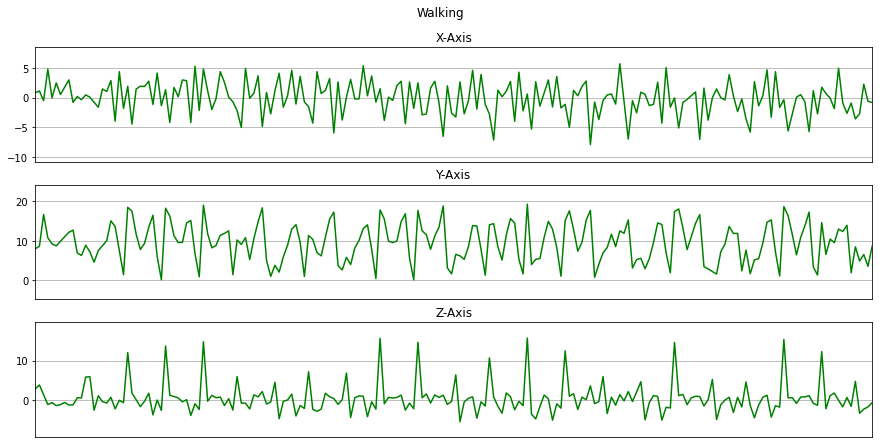

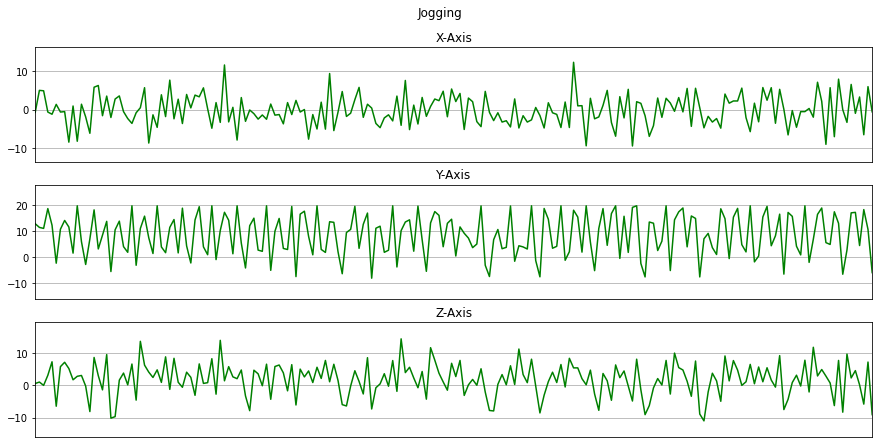

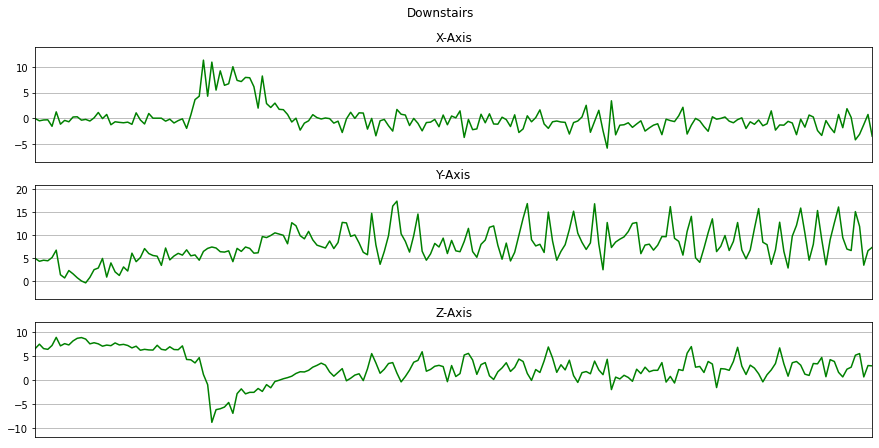

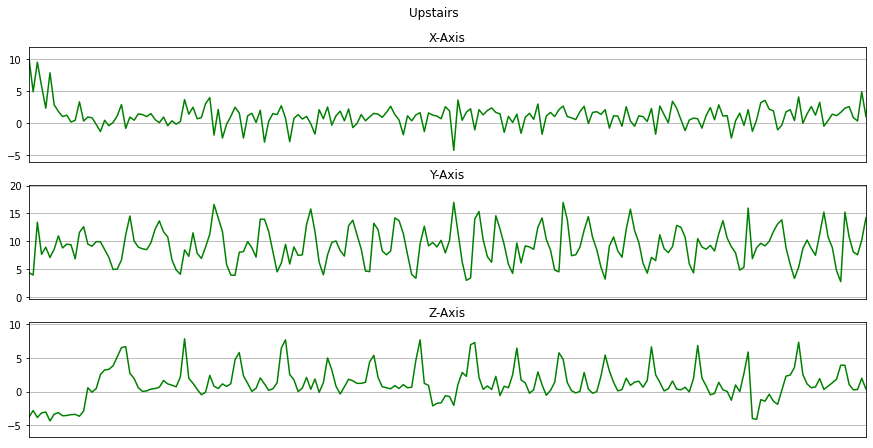

In [ ]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

In [ ]:
df = data.drop(['user', 'time'], axis = 1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [ ]:
df['activity'].value_counts()

Walking       56476
Jogging       43898
Downstairs    14836
Upstairs      13694
Name: activity, dtype: int64

In [ ]:
Walking = df[df['activity']=='Walking'].head(3555).copy()
Jogging = df[df['activity']=='Jogging'].head(3555).copy()
Upstairs = df[df['activity']=='Upstairs'].head(3555).copy()
Downstairs = df[df['activity']=='Downstairs'].head(3555).copy()
Sitting = df[df['activity']=='Sitting'].head(3555).copy()
Standing = df[df['activity']=='Standing'].copy()

In [ ]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balanced_data.shape

(14220, 4)

In [ ]:
balanced_data['activity'].value_counts()

Jogging       3555
Downstairs    3555
Upstairs      3555
Walking       3555
Name: activity, dtype: int64

In [ ]:
balanced_data.head()

,activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,3
598,Walking,1.116869,8.621680,3.786457,3
599,Walking,-0.503953,16.657684,1.307553,3
600,Walking,4.794363,10.760075,-1.184970,3
601,Walking,-0.040861,9.234595,-0.694638,3


In [ ]:
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
0,-0.125240,-0.234476,0.439951,3
1,-0.057104,-0.115641,0.731867,3
2,-0.462515,1.442414,0.004077,3
3,0.862737,0.298960,-0.727712,3
4,-0.346683,0.003193,-0.583753,3
...,...,...,...,...
14215,0.323873,-0.488225,0.339980,0
14216,-0.469030,0.015874,0.072058,0
14217,-0.066326,0.097306,0.327984,0
14218,0.456440,0.031385,0.867828,0


In [ ]:
import scipy.stats as stats

In [ ]:
Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

In [ ]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [ ]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [ ]:
X.shape, y.shape

((354, 80, 3), (354,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
X_train.shape, X_test.shape

((283, 80, 3), (71, 80, 3))

In [ ]:
X_train[0].shape, X_test[0].shape

((80, 3), (80, 3))

In [ ]:
X_train = X_train.reshape(283, 80, 3, 1)
X_test = X_test.reshape(71, 80, 3, 1)

In [ ]:
X_train[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

In [ ]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)

Epoch 1/10
9/9 [==============================] - 1s 48ms/step - loss: 1.5667 - accuracy: 0.3180 - val_loss: 1.2655 - val_accuracy: 0.4507
Epoch 2/10
9/9 [==============================] - 0s 17ms/step - loss: 1.2358 - accuracy: 0.4417 - val_loss: 1.0327 - val_accuracy: 0.6479
Epoch 3/10
9/9 [==============================] - 0s 17ms/step - loss: 1.0445 - accuracy: 0.5760 - val_loss: 0.8813 - val_accuracy: 0.6761
Epoch 4/10
9/9 [==============================] - 0s 17ms/step - loss: 0.9130 - accuracy: 0.6219 - val_loss: 0.7402 - val_accuracy: 0.6901
Epoch 5/10
9/9 [==============================] - 0s 16ms/step - loss: 0.7177 - accuracy: 0.7102 - val_loss: 0.6004 - val_accuracy: 0.7887
Epoch 6/10
9/9 [==============================] - 0s 16ms/step - loss: 0.6201 - accuracy: 0.7385 - val_loss: 0.4800 - val_accuracy: 0.8028
Epoch 7/10
9/9 [==============================] - 0s 18ms/step - loss: 0.4935 - accuracy: 0.8057 - val_loss: 0.3896 - val_accuracy: 0.8732
Epoch 8/10
9/9 [===========

In [ ]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

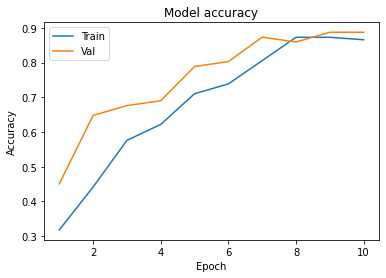

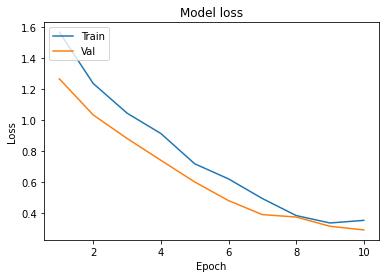

In [ ]:
plot_learningCurve(history, 10)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred=model.predict(X_test) 


In [ ]:
print(y_pred)


[[3.28285515e-01 1.10486537e-01 4.36122149e-01 1.10037148e-01
  4.71887738e-03 1.03496853e-02]
 [7.03931749e-01 1.51779596e-02 2.78747290e-01 1.32859405e-03
  2.85020826e-04 5.29312005e-04]
 [1.24733255e-03 9.98409688e-01 2.00527684e-05 3.20320280e-04
  8.54155076e-07 1.93826395e-06]
 [7.43240491e-02 6.89542852e-03 9.13058281e-01 4.57817921e-03
  3.54519987e-04 7.89513753e-04]
 [1.35408237e-03 9.98598278e-01 2.43168188e-06 4.40394433e-05
  7.12359679e-07 4.79637833e-07]
 [3.97359363e-05 9.99933600e-01 1.83716324e-07 2.63968850e-05
  5.71259804e-08 7.12011072e-08]
 [6.65572952e-05 9.99886036e-01 1.00483220e-07 4.73682157e-05
  4.71180002e-08 2.63433808e-08]
 [8.06517806e-03 1.00005958e-02 4.50550951e-03 9.75554049e-01
  8.79722647e-04 9.94914211e-04]
 [8.75324428e-01 4.89151739e-02 4.36773039e-02 2.93879174e-02
  1.43617066e-03 1.25909201e-03]
 [6.23094976e-01 3.05948611e-02 3.40985328e-01 3.37786227e-03
  4.19327291e-04 1.52764877e-03]
 [5.41777611e-01 3.58224362e-02 4.15270150e-01 4.7

In [ ]:
model.save_weights('model.h5')